In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Read in the data, reading in a few columns as datetime objects
tbl = pd.read_csv('data/ums_viz.csv', parse_dates = [1, 4, 12])

In [69]:
# Each row corresponds to a single transaction
print tbl.head()

   UMS_acct_no acct_created  cust_type             perf_name  \
0         1111   1979-08-06  Household   The Infernal Comedy   
1         1111   1979-08-06  Household      Yuja Wang, piano   
2         1111   1979-08-06  Household   London Philharmonic   
3         1111   1979-08-06  Household      Hamburg Symphony   
4         1111   1979-08-06  Household  Chicago Symphony Orc   

              perf_dt  tck_amt  num_seats            venue    price_type  \
0 2011-10-01 20:00:00      112          2  Hill Auditorium  Choral Union   
1 2011-10-09 16:00:00       80          2  Hill Auditorium  Choral Union   
2 2011-12-06 19:30:00      112          2  Hill Auditorium  Choral Union   
3 2012-01-29 16:00:00       92          2  Hill Auditorium  Choral Union   
4 2012-03-09 20:00:00      140          2  Hill Auditorium  Choral Union   

  price_type_group  mode_of_sale sales_channel   order_dt postal_code  
0      Subs Prices  Subscription           Fax 2011-05-31       48103  
1      Subs Pr

In [70]:
# Take a look at the columns and their data types
print "Columns:"
for col in tbl.columns.tolist():
    print "\t%16s" % col + " : " + str(tbl[col].dtype)

Columns:
	     UMS_acct_no : int64
	    acct_created : datetime64[ns]
	       cust_type : object
	       perf_name : object
	         perf_dt : datetime64[ns]
	         tck_amt : float64
	       num_seats : int64
	           venue : object
	      price_type : object
	price_type_group : object
	    mode_of_sale : object
	   sales_channel : object
	        order_dt : datetime64[ns]
	     postal_code : object


In [71]:
# From this table we can derive an account-level table

acc_tbl = tbl[['UMS_acct_no', 'acct_created', 'cust_type']]
acc_tbl = acc_tbl.drop_duplicates()
acc_tbl = acc_tbl.set_index('UMS_acct_no')

print acc_tbl.head()

            acct_created  cust_type
UMS_acct_no                        
1111          1979-08-06  Household
1115          1988-02-18  Household
1122          1988-02-10  Household
1130          1988-02-26  Household
1131          1988-02-26  Household


In [86]:
# We can aggregate some purchase-level statistics for each account

grpAcct = tbl.groupby('UMS_acct_no')

acc_tbl['num_purchases']        = grpAcct['acct_created'].count() # any var works here, just need the count
acc_tbl['total_purchase_amt']   = grpAcct['tck_amt'].sum()
acc_tbl['max_purchase_amt']     = grpAcct['tck_amt'].max()
acc_tbl['avg_purchase_amt']     = grpAcct['tck_amt'].mean()
acc_tbl['total_num_seats']      = grpAcct['num_seats'].sum()
acc_tbl['avg_seat_amt']         = grpAcct['tck_amt'].sum() / grpAcct['num_seats'].sum()
acc_tbl['most_recent_purchase'] = grpAcct['perf_dt'].max()
acc_tbl['first_purchase']       = grpAcct['perf_dt'].min()

print acc_tbl.head()

            acct_created  cust_type  num_purchases  total_purchase_amt  \
UMS_acct_no                                                              
1111          1979-08-06  Household             29                3008   
1115          1988-02-18  Household             33                4066   
1122          1988-02-10  Household              1                 200   
1130          1988-02-26  Household              8                 652   
1131          1988-02-26  Household             20                2616   

             max_purchase_amt  avg_seat_amt most_recent_purchase  \
UMS_acct_no                                                        
1111                      150     54.690909  2014-04-13 16:00:00   
1115                      184     66.655738  2014-04-13 16:00:00   
1122                      200    100.000000  2012-09-27 19:30:00   
1130                      130     43.466667  2013-12-08 14:00:00   
1131                      182     65.400000  2013-04-20 20:00:00   

    

In [87]:
# Show some interesting aggregate statistics

no_orders = len(tbl)
no_accts = len(acc_tbl)
no_purchases_by_acct  = tbl['UMS_acct_no'].value_counts()
no_accts_by_no_purchases = no_purchases_by_acct.value_counts()

print "Number of ticket purchases:                  ", len(tbl)
print "Number of unique UMS accounts:               ", len(acc_tbl)
print "Maximum no. of purchases on one account:     ", np.max(acc_tbl['num_purchases'])
print "Fraction of accts with just one transaction: ", np.mean(acc_tbl['num_purchases']==1)
print "Mean number of purchases per account:        ", np.mean(acc_tbl['num_purchases'])

Number of ticket purchases:                104737
Number of unique UMS accounts:             30325
Maximum no. of purchases on one account:   358
Fraction of accts with just one purchase:  0.562374278648
Mean number of purchases per account:      3.45381698269


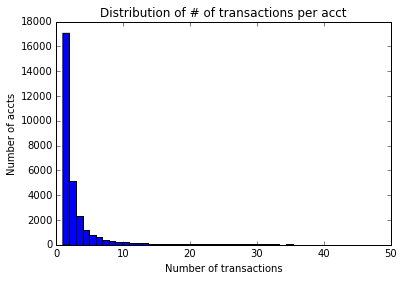

Number of people with >50 transactions: 123


In [97]:
# How many tickets do people buy?

plt.hist(acc_tbl['num_purchases'][acc_tbl['num_purchases']<=50].values, bins=50)
plt.title('Distribution of # of transactions per acct')
plt.xlabel('Number of transactions')
plt.ylabel('Number of accts')
plt.show()

print "Number of people with >50 transactions:", (acc_tbl['num_purchases']>50).sum()

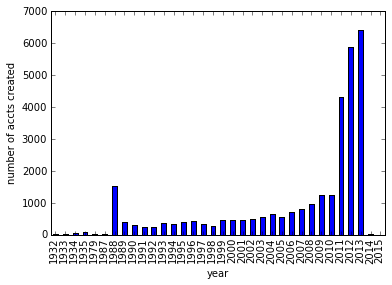

In [99]:
# How long have these accounts been around?

acc_tbl['acct_created'].groupby(acc_tbl['acct_created'].dt.year).count().plot(kind="bar")
plt.xlabel('year')
plt.ylabel('number of accts created')
plt.show()

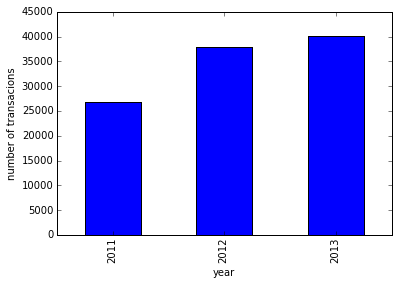

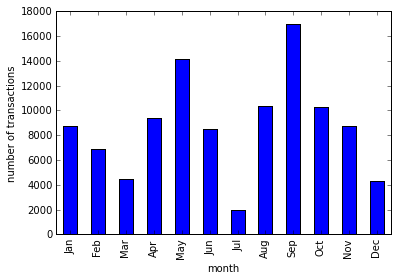

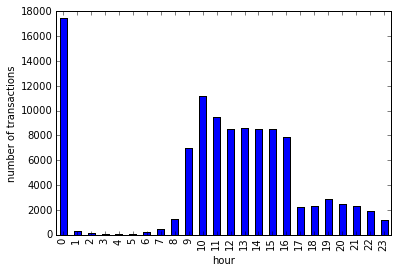

In [123]:
# When do transactions occur?

tbl['order_dt'].groupby(tbl['order_dt'].dt.year).count().plot(kind="bar")
plt.xlabel('year')
plt.ylabel('number of transacions')
plt.show()

ax = tbl['order_dt'].groupby(tbl['order_dt'].dt.month).count().plot(kind="bar")
plt.xlabel('month')
plt.ylabel('number of transactions')
month_list = [datetime.date.strftime(datetime.date(year=1900, month=x, day = 1),'%b') for x in range(1,13)]
ax.set_xticklabels(month_list)
plt.show()

tbl['order_dt'].groupby(tbl['order_dt'].dt.hour).count().plot(kind="bar")
plt.xlabel('hour')
plt.ylabel('number of transactions')
plt.show()

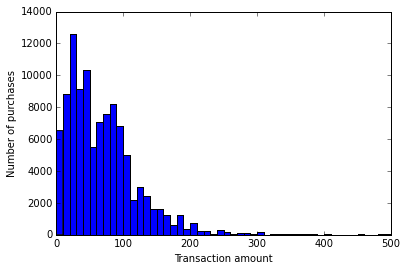

Number of transactions over $500: 193


In [127]:
# How expensive are transactions?

plt.hist(tbl['tck_amt'].loc[tbl['tck_amt']<=500], bins=50)
plt.xlabel('Transaction amount')
plt.ylabel('Number of purchases')
plt.show()

print 'Number of transactions over $500:', (tbl['tck_amt']>500).sum()

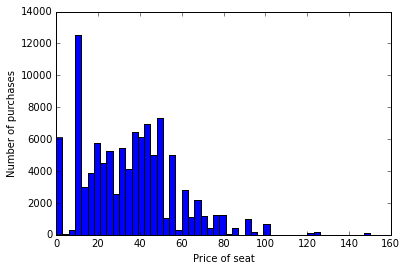

Number of transactions over $150/seat: 1


In [133]:
# How expensive is each seat?

norm_tck_price = tbl['tck_amt']/tbl['num_seats']

plt.hist(norm_tck_price.loc[norm_tck_price <= 150], bins=50)
plt.xlabel('Price of seat')
plt.ylabel('Number of purchases')
plt.show()

print 'Number of transactions over $150/seat:', (norm_tck_price>150).sum()

In [61]:
# Let's look at some of the categorical variables

acc_tbl.groupby('cust_type')['cust_type'].count()

cust_type
Household        2594
Individual      27520
Organization      211
Name: cust_type, dtype: int64

In [62]:
tbl.groupby('venue')['venue'].count()

venue
Arthur Miller Theatre              664
Corner Brewery                     405
Dance Club                          39
Demo Theater                         5
Downtown Home & Garden             280
General Admission (Education)       54
Hill Auditorium                  60539
Lydia Mendelssohn Theatre          752
Michigan Theater                  7806
Music Hall                         175
Performance Network                882
Power Center                     21468
Rackham Auditorium                9264
St Andrew's Episcopal Church       280
St. Francis of Assisi Church      2124
Name: venue, dtype: int64

In [63]:
print tbl.groupby('price_type')['price_type'].count()

print "Number of price types:", len(np.unique(tbl['price_type']))

price_type
$10 Off                           472
$10 off inc 1                      92
$10 off inc 2                       6
$5 Off                              4
20% off                            22
50% off                           176
AARP Discount                       2
Adult                           39204
Adult inc 1                      2411
Adult inc 2                      1305
Adult inc 3                       414
Arts & Eats                      1082
Asia Series                        36
Bert's Ticket                     220
Buy one get one free               15
Chamber Arts                     2748
Child                             209
Child Under 2                      14
Choral Union                    10871
Chorus Comp                        83
Chorus Member                     557
Comp                             5131
Dance Series                     1219
Discount                          627
Discount 2                         93
Discount Student                   12
D

In [64]:
print tbl.groupby('price_type_group')['price_type_group'].count()

price_type_group
Comps                  5307
Discounted Prices      2690
Group Prices           1971
Promotional Prices     2943
Regular Prices        43651
Student Prices        17192
Subs Prices           30983
Name: price_type_group, dtype: int64


In [65]:
print tbl.groupby('mode_of_sale')['mode_of_sale'].count()

mode_of_sale
Arts and Eats                      578
Bert's Ticket                      220
Door Rush Tickets                  261
Education                           10
Group Promotions                    72
Group Sales                       2391
Night of Show                     1717
Phone/Mail                       11368
Rush Bucks Tickets                 399
Rush Tickets                      3284
Single Return/Exchange             724
Student Half Price                4838
Subs Return/Exchange              1946
Subscription                     28559
UMS 48 hr Return/Exchange           86
UMS Dept Requests                 4056
Walk Up                          11203
Web - UMS - $10 off                108
Web - UMS - $5 off                  60
Web - UMS - 25% off                146
Web - UMS - AARP                     2
Web - UMS - Arts and Eats          464
Web - UMS - BOGO                     3
Web - UMS - CU Rush                196
Web - UMS - Discounts              721
Web - UMS - 

In [66]:
print tbl.groupby('sales_channel')['sales_channel'].count()

sales_channel
Comp Form                   461
Customer Service Issue     3204
E-Mail                      651
Fax                         195
Google form                 221
In-Person (Devo)             34
Mail                       3784
Night of Show - Venue      1982
Order Import                 17
Phone                     34643
UM-OUD                        1
Walk Up - League          22630
Web-Cybersource            1072
Web-TNEW                  33641
ums.org                    2201
Name: sales_channel, dtype: int64
